**Linear Regression using Numpy from scratch**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("D:\Summer_School_2023-main\Summer_School_2023-main\Session_2\data.csv",header=None)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP\AppData\Local\Temp\ipykernel_3180\3862090589.py:1: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv("D:\Summer_School_2023-main\Summer_School_2023-main\Session_2\data.csv",header=None)


,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
#now we will add the column names to the data frame 
x=df[0].values #this will give us the values of the first column in the data frame
y=df[1].values #this will give us the values of the second column in the data frame


Viewing the dataset 

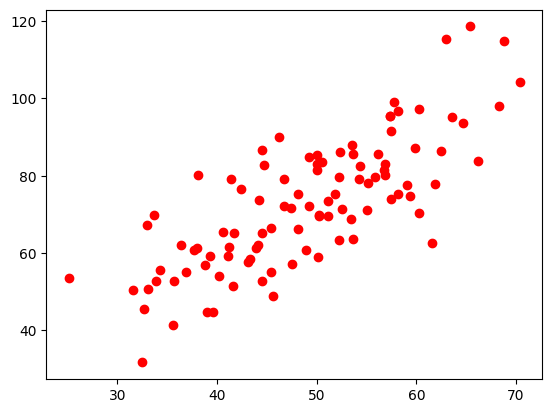

In [4]:
plt.figure()
plt.plot(x,y,'ro')
#ro sets the data points to red dots 
plt.show()


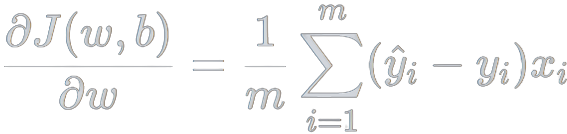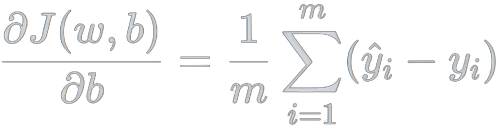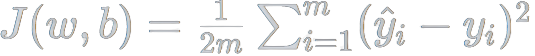

In [7]:
# now we define hyperparameters  
num_iterations=50 #number of iterations   
lr=0.0001 #learning rate
#initalizing the variables m and c 
m=0.0
c=0.0

#now we will define the cost function
#list to keep track of cost function 
history_cost=[]   # this will keep track of the cost function   
m_hist=[] # this will keep track of the values of m 
c_hist=[] # this will keep track of the values of c     

for i in range(num_iterations): #this loop will run for the number of iterations 
    y_pred=m*x +c #this is the predicted value of y   
    error=y_pred-y #this is the error in the prediction     
    cost=0.5*np.mean(error**2)  #this is the cost function 

    m_deriv=np.mean((y_pred-y)*x) #this is the derivative of the cost function with respect to m
    c_deriv=np.mean(y_pred-y) #this is the derivative of the cost function with respect to c

    # here we are simulataneously updating the values of m and c
    m=m-lr*m_deriv # this is the update rule for m and here we are updating the value of m by subtracting the derivative of the cost function with respect to m multiplied by the learning rate  
    c=c-lr*c_deriv # this is the update rule for c and here we are updating the value of c by subtracting the derivative of the cost function with respect to c multiplied by the learning rate

    history_cost.append(cost)  #this will keep track of the cost function  
    m_hist.append(m) #this will keep track of the values of m 
    c_hist.append(c) #this will keep track of the values of c 
print(m) #this will print the value of m :slope 
print(c) #this will print the value of c :intercept 

    

1.4788903781318354
0.030569950649287986


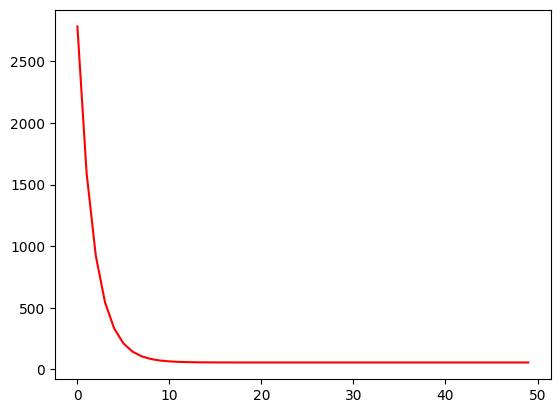

In [8]:
#plotting the cost function for each iteration
plt.figure()
x_labels = np.arange(0, len(history_cost), 1)
plt.plot(x_labels,history_cost, 'r')
plt.show()

 **what we can see from the plot is that the cost function is decreasing with each iteration and this is what we want to achieve**




**Plotting THe Best Fit Line**

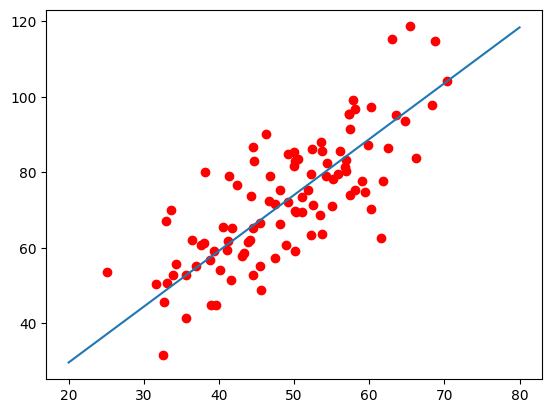

In [11]:
plt.figure()
plt.plot(x,y,'ro')
x_line=np.linspace(20,80,100) # this will create a line from 20 to 80 with 100 points and linspcase is used to create a line
y_line=m*x_line+c #this is the equation of the line  
plt.plot(x_line,y_line) 

 here we can see that the best fit line is plotted on the data points and it is the best fit line because it has the least cost function value it cover most of the data points

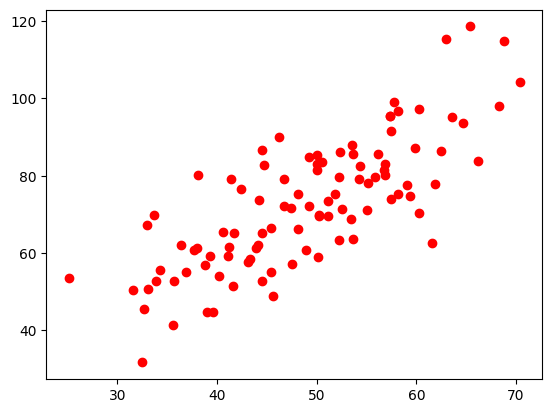

In [12]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

plt.plot(x,y,'ro')
line, = ax.plot([], [], lw=2)
def animate(i):
    x = np.arange(20,90)
    y = m_hist[i] * x + c_hist[i]
    line.set_data(x, y)
    return (line,)

In [14]:
import matplotlib.animation as animation
anim = animation.FuncAnimation(fig, animate, frames=len(m_hist), interval=100)
anim = animation.FuncAnimation(fig, animate,frames=len(m_hist), interval=100)
HTML(anim.to_html5_video())


c:\Program Files\Python312\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


RuntimeError: Requested MovieWriter (ffmpeg) not available

# Linear Regression implementation using Scikit-Learn 


In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

Intercept: 7.991020982270399
Slope: [1.32243102]


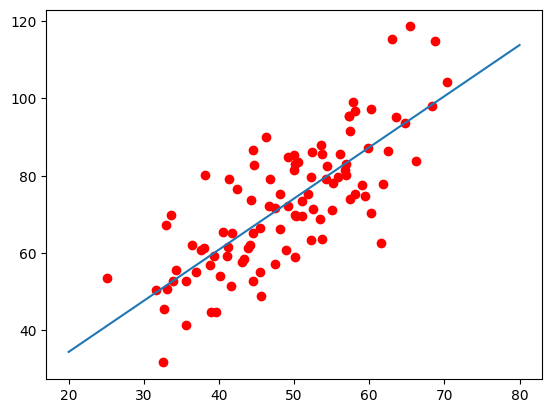

In [18]:
x=np.array(df.iloc[:,0]).reshape(-1,1) # this will give us the values of the first column in the data frame and we are reshaping it to a 2D array  
y=np.array(df.iloc[:,1]) # this will give us the values of the second column in the data frame

model=LinearRegression().fit(x,y) #this will fit the model to the data

#print the intercept 
print('Intercept:', model.intercept_)
c=model.intercept_

#print the slope
print('Slope:', model.coef_)
m=model.coef_

#predict a response and print it 
y_pred=model.predict(x) 
plt.figure()
plt.plot(x,y,'ro')  
x_line=np.linspace(20,80,100) # this will create a line from 20 to 80 with 100 points and linspcase is used to create a line
y_line=m*x_line+c #this is the equation of the line
plt.plot(x_line,y_line)
